# Chapter: 5
## Section: Synthetic Minority Over-sampling Technique (SMOTE)

In [ ]:
!pip install imblearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_fun(x_plot: list, y_plot: list, title: str):
  """
  Plotting a binary classification dataset
  :param x_plot: list of x coordinates (i.e. dimension 1)
  :param y_plot: list of y coordinates (i.e. dimension 2)
  :param title: title of plot
  """
  cmap, norm = mcolors.from_levels_and_colors([0, 1, 2], ['black', 'red'])
  plt.scatter([x_plot[iter][0] for iter in range(0, len(x_plot))],
              [x_plot[iter][1] for iter in range(0, len(x_plot))],
              c=y_plot, cmap=cmap, norm=norm)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.xlabel('1st dimension', fontsize = 12)
  plt.ylabel('2nd dimension', fontsize = 12)
  plt.title(title)
  plt.show()

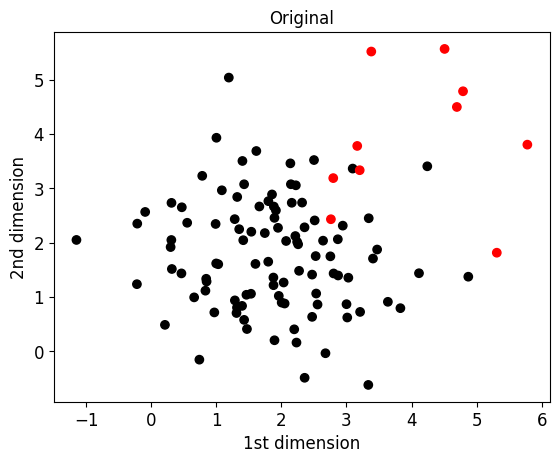

In [3]:
np.random.seed(12)
minority_sample_size = 10
majority_sample_size = 100
# generating random set of x coordinates
group_1_X1 = np.repeat(2,majority_sample_size)+\
np.random.normal(loc=0, scale=1,size=majority_sample_size)
group_1_X2 = np.repeat(2,majority_sample_size)+\
np.random.normal(loc=0, scale=1,size=majority_sample_size)
# generating random set of x coordinates
group_2_X1 = np.repeat(4,minority_sample_size)+\
np.random.normal(loc=0, scale=1,size=minority_sample_size)
group_2_X2 = np.repeat(4,minority_sample_size)+\
np.random.normal(loc=0, scale=1,size=minority_sample_size)

X_all = [[group_1_X1[iter], group_1_X2[iter]] for\
         iter in range(0, len(group_1_X1))]+\
         [[group_2_X1[iter], group_2_X2[iter]]\
          for iter in range(0, len(group_2_X1))]
y_all = [0]*majority_sample_size+[1]*minority_sample_size
# plotting the randomly generated data
plot_fun(x_plot = X_all, y_plot = y_all, title = 'Original')

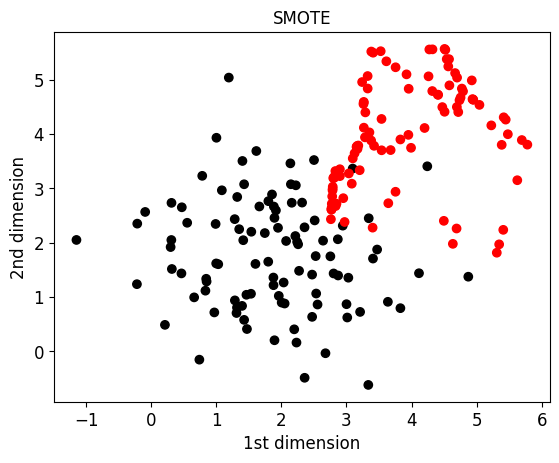

In [4]:
from imblearn.over_sampling import SMOTE
import matplotlib.colors as mcolors
# using 5 neighbours for each datapoint in the oversampling process by SMOTE
k_neighbors = 5
# initializing smote
# using 'auto', equivalent to 'not majority',
# sampling_strategy that enforces resampling all classes but the majority class
smote = SMOTE(sampling_strategy='auto',
              k_neighbors=k_neighbors)
# fitting smote to oversample the minority class
x_smote, y_smote = smote.fit_resample(X_all, y_all)
# plotting the resulted oversampled data
plot_fun(x_plot = x_smote, y_plot = y_smote, title = 'SMOTE')

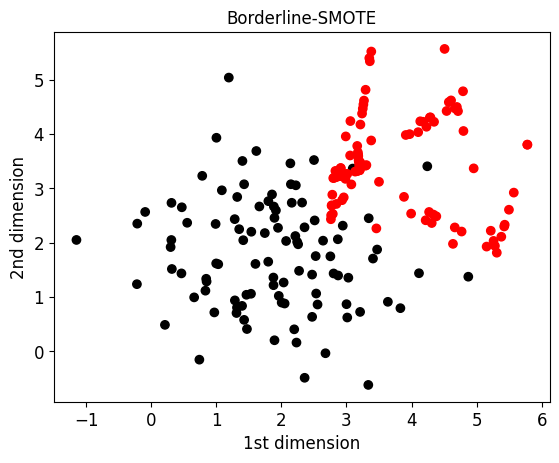

In [5]:
from imblearn.over_sampling import BorderlineSMOTE

# using 5 neighbours for each datapoint in the oversampling process by SMOTE
k_neighbors = 5
# using 5 neighbours to determine if a minority sample is in “danger”
m_neighbors = 10
# initializing borderline smote
# using 'auto', equivalent to 'not majority', sampling_strategy that enforces resampling all classes but the majority class
borderline_smote = BorderlineSMOTE(sampling_strategy='auto',
                                   k_neighbors=k_neighbors,
                                   m_neighbors=m_neighbors)
# fitting borderline smote to oversample the minority class
x_bordersmote, y_bordersmote = borderline_smote.fit_resample(X_all, y_all)
# plotting the resulted oversampled data
plot_fun(x_plot = x_bordersmote, y_plot = y_bordersmote, title = 'Borderline-SMOTE')

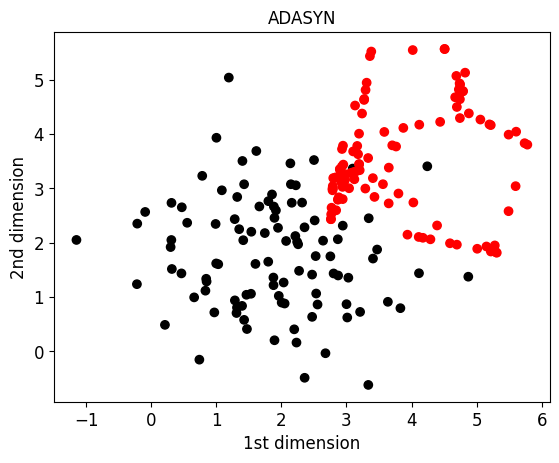

In [6]:
from imblearn.over_sampling import ADASYN

# using 5 neighbours for each datapoint in the oversampling process by SMOTE
n_neighbors = 5
# initializing ADASYN
# using 'auto', equivalent to 'not majority', sampling_strategy that enforces resampling all classes but the majority class
adasyn_smote = ADASYN(sampling_strategy = 'auto',
                      n_neighbors = n_neighbors)
# fitting ADASYN to oversample the minority class
x_adasyn_smote, y_adasyn_smote = adasyn_smote.fit_resample(X_all, y_all)
# plotting the resulted oversampled data
plot_fun(x_plot = x_adasyn_smote, y_plot = y_adasyn_smote, title = "ADASYN")